In [1]:
 import cobra
import pandas as pd
import os
from os.path import join
from cobra import Model, Reaction, Metabolite
from cobra.sampling import sampling
import numpy as np
# os.environ["R_HOME"] = f"{os.environ['CONDA_PREFIX']}\\Lib\\R"
# import rpy2.robjects
from plotnine import *
import matplotlib.pyplot as plt

In [2]:
# Importing the model
model1=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880_jsb.xml")
model1.objective = "BIOMASS_RT"  

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-21


In [3]:
# Lab data
glucose_uptakes= [0.476, 1.114, 1.648, 2.305, 2.66, 3.1] # the fifth glc uptake value was calculated

# All fluxes for getting all rxn names
solution1 = model1.optimize()
all_fluxes = solution1.fluxes.to_frame(name='Flux')

In [4]:
# Get all fluxes on different glucose uptake
all_fluxes_biomass_max = pd.DataFrame(columns=['Growth rate', 'Glucose uptake', *all_fluxes.index], index=range(len(glucose_uptakes))) #flux_values.index gives the row names column, * extracts the list of strings

for i in range(len(glucose_uptakes)):
    model=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880_jsb.xml")
    model.objective = "BIOMASS_RT"  
    model.reactions.EX_glc__D_e.bounds = -(glucose_uptakes[i]), -(glucose_uptakes[i])
    
    solution = model.optimize()
    all_fluxes_biomass_max.loc[i] = solution.fluxes[['BIOMASS_RT', 'EX_glc__D_e', *all_fluxes.index]].values

all_fluxes_biomass_max

,Growth rate,Glucose uptake,ALCD25yi,MTHFCm,AMPN,DAGCPTer_RT,PYRt2,NNDPRm,HMGCOASm,PDE4,...,BTNt2i,EX_fol_e,FOLt,NADtm,EX_pydxn_e,PYDXNtr,RIBFLVt2,tr_0001,EXC_OUT_phyto_d,MDHc
0,0.033961,-0.476,0.0,0.0,0.0,0.0,0.0,0.0,-0.00006,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.198513
1,0.082468,-1.114,0.0,0.0,0.0,0.0,0.0,0.0,-0.000145,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.482057
2,0.123068,-1.648,0.0,0.0,0.0,0.0,0.0,0.0,-0.000217,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.719381
3,0.17302,-2.305,0.0,0.0,0.0,0.0,0.0,0.0,-0.000305,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.011369
4,0.200011,-2.66,0.0,0.0,0.0,0.0,0.0,0.0,-0.000353,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.16914
5,0.233464,-3.1,0.0,0.0,0.0,0.0,0.0,0.0,-0.000412,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.364688


In [5]:
# Get specific metabolites with their fluxes
exchange_fluxes_table = all_fluxes_biomass_max[['EX_glc__D_e', 'EX_o2_e', 'EX_nh4_e','EX_so4_e','EX_pi_e', 'EX_co2_e']]
exchange_fluxes_table

,EX_glc__D_e,EX_o2_e,EX_nh4_e,EX_so4_e,EX_pi_e,EX_co2_e
0,-0.476,-1.137428,-0.224151,-0.003404,-0.009041,1.264728
1,-1.114,-2.510728,-0.544314,-0.008266,-0.021954,2.819853
2,-1.648,-3.660167,-0.812287,-0.012336,-0.032763,4.121479
3,-2.305,-5.074364,-1.141985,-0.017343,-0.046061,5.722917
4,-2.66,-5.838504,-1.320132,-0.020049,-0.053246,6.58823
5,-3.1,-6.785607,-1.540934,-0.023402,-0.062152,7.660731


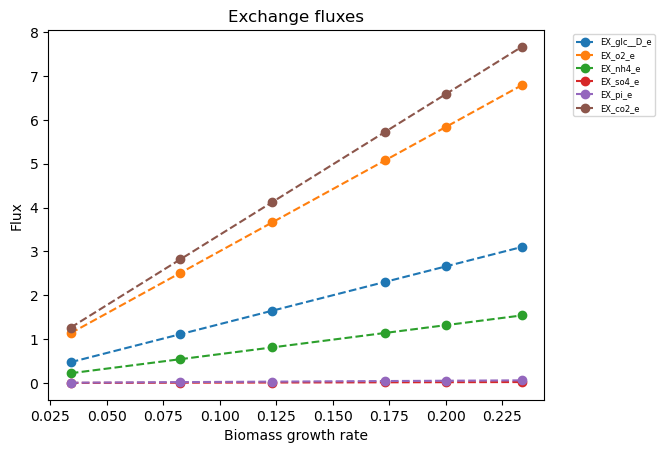

In [6]:
# Exchange fluxes plot
GR_range = all_fluxes_biomass_max['BIOMASS_RT']
plt.plot(GR_range, np.abs(exchange_fluxes_table[exchange_fluxes_table.columns]), 'o--', label = exchange_fluxes_table.columns)

plt.xlabel('Biomass growth rate')
plt.ylabel('Flux')
plt.title("Exchange fluxes")
plt.legend(fontsize=6, loc='upper left', bbox_to_anchor=(1.05, 1))
# plt.yticks(range(0, 20, 1))
plt.show()

In [7]:
PPP_fluxes = all_fluxes_biomass_max[['BIOMASS_RT', 'EX_glc__D_e', 'G6PDH2r', 'TKT1', 'TALA','TKT2', 'XPK','PYRDC','PDHm', 'FPK']]
# Change G6PDH2rp column name to oxpp 
PPP_fluxes = PPP_fluxes.rename(columns = {'G6PDH2r': 'oxpp'})
PPP_fluxes

,BIOMASS_RT,EX_glc__D_e,oxpp,TKT1,TALA,TKT2,XPK,PYRDC,PDHm,FPK
0,0.033961,-0.476,0.013915,-0.011487,-0.011487,-0.017843,0.0,0.03121,0.53422,0.0
1,0.082468,-1.114,0.084058,-0.011138,-0.793629,-0.026574,0.0,0.075789,1.196733,0.0
2,0.123068,-1.648,0.142767,-0.010847,-1.158355,-0.033882,0.0,0.113101,1.751251,0.0
3,0.17302,-2.305,0.214998,-0.010488,-1.607091,-0.042872,0.0,0.159007,2.433495,0.0
4,0.200011,-2.66,0.254027,-0.010294,-0.010294,-0.04773,0.0,0.183812,2.802135,0.0
5,0.233464,-3.1,0.302401,-0.010054,-2.150083,-0.053752,0.0,0.214556,3.25904,0.0


In [8]:
ATPM_ACITL_fluxes = all_fluxes_biomass_max[['BIOMASS_RT', 'EX_glc__D_e', 'ATPM', 'ACITL', 'ACS']] #ACS - Acetyl-CoA synthetase
ATPM_ACITL_fluxes

,BIOMASS_RT,EX_glc__D_e,ATPM,ACITL,ACS
0,0.033961,-0.476,1.22,0.182372,0.003404
1,0.082468,-1.114,1.22,0.442861,0.008266
2,0.123068,-1.648,1.22,0.660888,0.012336
3,0.17302,-2.305,1.22,0.929135,0.017343
4,0.200011,-2.66,1.22,1.074078,0.020049
5,0.233464,-3.1,1.22,1.253725,0.023402


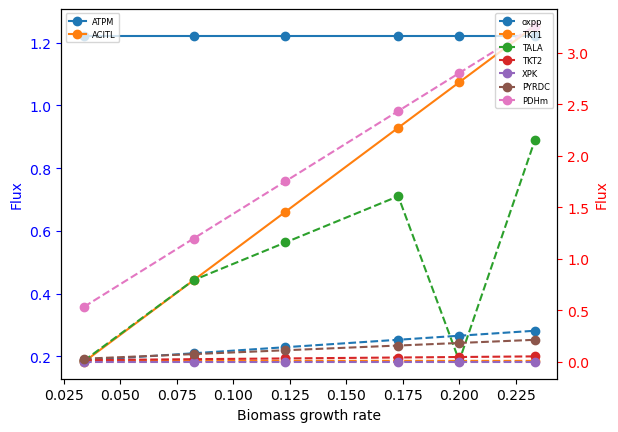

In [9]:
# Plot the PPP enzymes fluxes with ATPM and ACITL on seperate y-axis
GR_range = all_fluxes_biomass_max['BIOMASS_RT']
# Sample data
x = GR_range
y1 = np.abs(ATPM_ACITL_fluxes[['ATPM', 'ACITL']])
y2 = np.abs(PPP_fluxes[['oxpp', 'TKT1', 'TALA','TKT2', 'XPK','PYRDC','PDHm']])

# # Define colors for each label
# colors = {'ATPM': 'black', 'ACITL': 'orange', 'oxpp': 'yellow', 'TKT1': 'green', 'TKT2': 'blue', 'TALA': 'red', 'XPK': 'pink','PYRDC': 'brown' ,'PDHm': 'purple'}
# labels = ['ATPM', 'ACITL', 'oxpp', 'TKT1', 'TKT2', 'TALA', 'XPK','PYRDC','PDHm']
# Create the first plot
fig, ax1 = plt.subplots()

ax1.plot(x, y1, 'o-', label=['ATPM', 'ACITL'])
ax1.set_xlabel('Biomass growth rate')
ax1.set_ylabel('Flux', color='b')
ax1.tick_params('y', colors='b')
ax1.legend(fontsize=6, loc='upper left')

# Create the second y-axis on the right
ax2 = ax1.twinx()

# Plot the second set of data on the right y-axis 
ax2.plot(x, y2, 'o--', label=['oxpp', 'TKT1', 'TALA','TKT2', 'XPK','PYRDC','PDHm'])
ax2.set_ylabel('Flux', color='r')
ax2.tick_params('y', colors='r')
ax2.legend(fontsize=6, loc='upper right')

# Show the plot
plt.show()

In [10]:
# # Get all fluxes to excel
# with pd.ExcelWriter('C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\Rt_IFO0880_jsb_results\\Rt_IFO0880_jsb_all_fluxes_biomass_max.xlsx') as excel_writer:
#     all_fluxes_biomass_max.to_excel(excel_writer, sheet_name='Sheet1', index=True)

In [11]:
# #  Get all flux values separately for dif growth rates, make them to a csv file
# for i in range(len(glucose_uptakes)):
#     all_fluxes_dif_glucose_uptakes.loc[i].to_csv(f'C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\Rt_IFO0880_jsb_results\\fluxes_biomass_max_{growth_rates[i]}.csv', index=True)